In [4]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('BDM\WHO-COVID-19-global-data.csv', skiprows = [1] )

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect("covid19.db")

In [ ]:
df.to_sql('covid19_gbl_tbl', conn)

In [ ]:
q1 = ' Select * from covid19_gbl_tbl '

In [ ]:
df = pd.read_sql(q1, conn)

In [ ]:
df.head()

In [ ]:
q2 =  'Select * FROM covid19_gbl_tbl where CC = "IN"' 

In [ ]:
df = pd.read_sql(q2, conn)

In [ ]:
df.head()

In [ ]:
df.to_csv (r'BDM\India_latest.csv', index = False, header=True)

In [ ]:
df= pd.read_csv('BDM\India_latest.csv', usecols=[1,5,6] , dtype={"Total_cases": int, "New_cases": int}, parse_dates=True )

In [ ]:
df.head()

In [ ]:
x = df["Date"]


In [ ]:
y= df["New_cases"]

In [5]:
import numpy as np

In [ ]:
train_set, test_set= np.split(df, [int(.80 *len(df))])

In [ ]:
print (train_set.shape)
print (test_set.shape)

In [ ]:
train_set.to_csv(r'BDM\India_latest_train.csv', index = False, header=True)

In [ ]:
test_set.to_csv(r'BDM\India_latest_test.csv', index = False, header=True)

In [6]:
df= pd.read_csv('BDM\India_latest_train.csv', parse_dates=True )

In [7]:
df.head()

,Date,New_cases,Total_cases
0,30-01-2020,1,1
1,31-01-2020,0,1
2,01-02-2020,0,1
3,02-02-2020,1,2
4,03-02-2020,1,3


In [8]:
x = df["Date"]

In [9]:
y= df["Total_cases"]

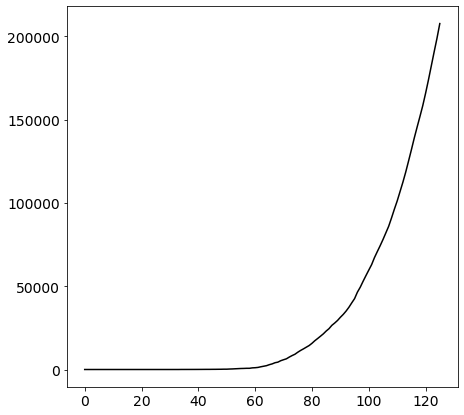

In [130]:
#plt.style.use('seaborn-whitegrid')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.plot(x, y, color ="black")
plt.show()

<BarContainer object of 126 artists>

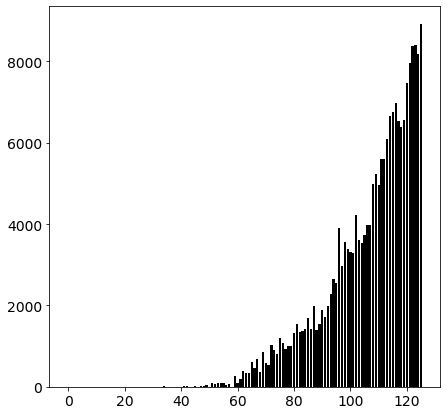

In [118]:
plt.bar(x, df["New_cases"], color ="black")

In [12]:
#linear fn: f(x) = a + b*x
def f(x1):
    return 10 + 1500*x1

y_linear = f(x1=np.arange(len(df)))

In [13]:
#Exponential function: f(x) = a + b^x

def f(x1):
    return 10 + 1.18**x1

y_exponential = f(x1=np.arange(len(df)))

In [14]:
#Logistic function: f(x) = a / (1 + e^(-b*(x-c)))

def f(x1): 
    return 90000 / (1 + np.exp(-0.5*(x1-20)))

y_logistic = f(x1=np.arange(len(df)))

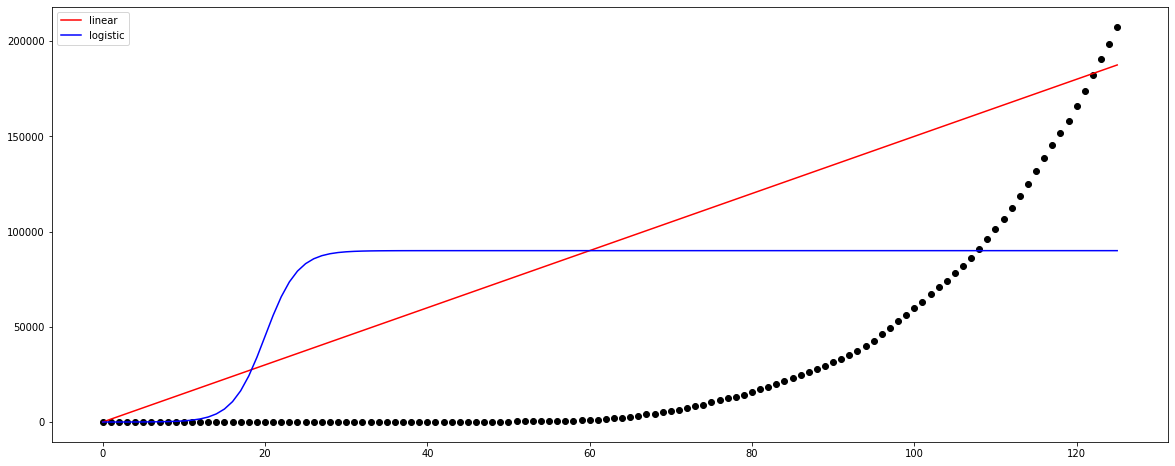

In [15]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df["Total_cases"].index, df["Total_cases"].values, color="black")
ax.plot(df["Total_cases"].index, y_linear, label="linear", color="red")

ax.plot(df["Total_cases"].index, y_logistic, label="logistic", color="blue")
#ax.plot(df["Total_cases"].index, y_exponential, label="exponential", color="green")

ax.legend()
plt.show()

In [16]:
df= pd.read_csv('BDM\India_latest_train.csv', parse_dates=True )
df.head()
df.tail()

,Date,New_cases,Total_cases
121,30-05-2020,7964,173763
122,31-05-2020,8380,182143
123,01-06-2020,8392,190535
124,02-06-2020,8171,198706
125,03-06-2020,8909,207615


In [131]:
#Gaussian function: f(x) = a * e^(-0.5 * ((x-μ)/σ)**2)
def f(x):
    return 10000 * np.exp(-0.5 * ((x-120)/6)**2)

y_gaussian = f(x=np.arange(len(df)))

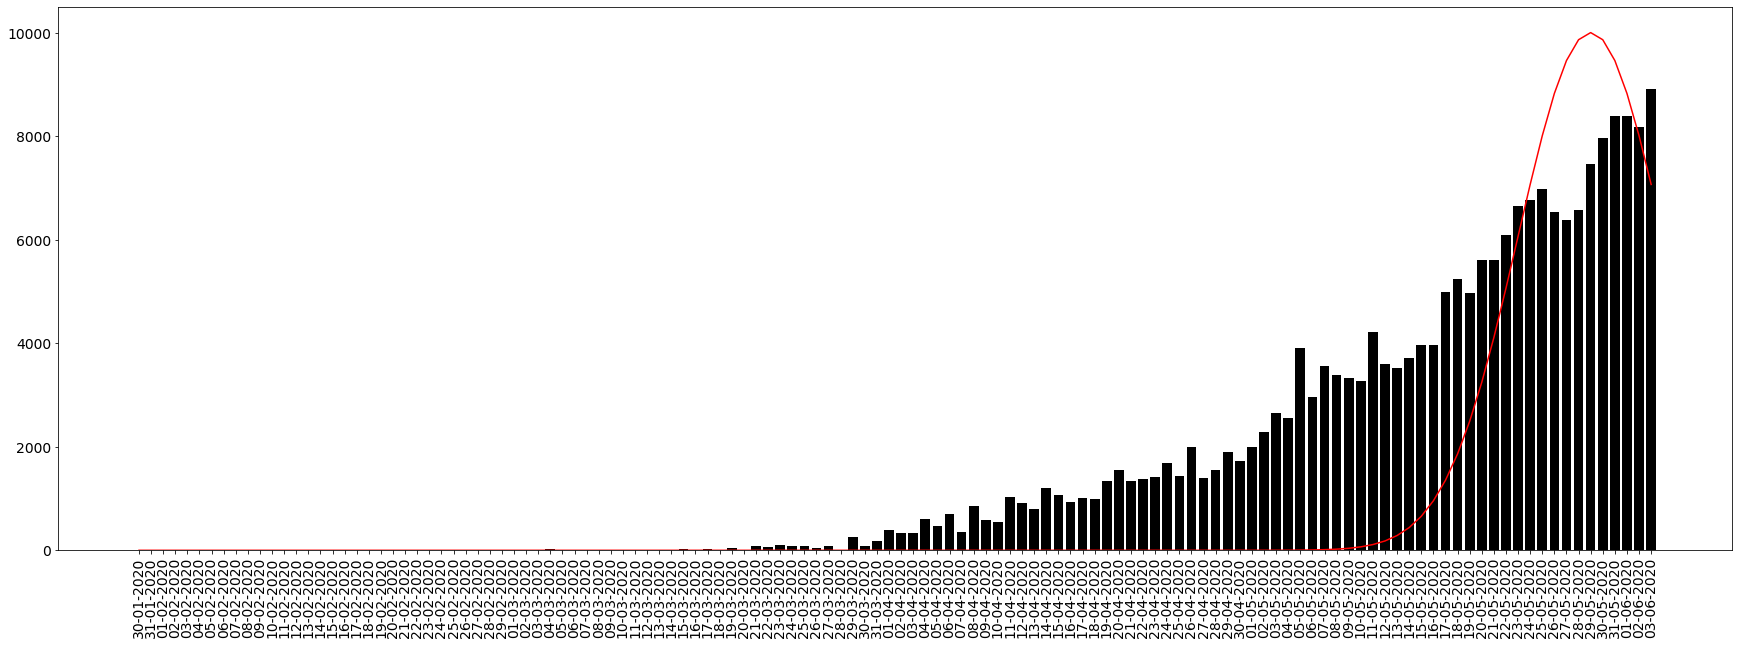

In [133]:
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(df["Date"], df["New_cases"].values, color="black")
ax.plot(df["Date"], y_gaussian, color="red")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig('bar_gaussian_func.jpg', dpi=300)  
plt.show()

In [126]:
#Function to fit. In this case logistic function:
#f(x) = capacity / (1 + e^-k*(x - midpoint) )
def logistic_model(xl,a,b,c):
    return c/(1+np.exp(-(xl-b)/a))

In [20]:
x = df["Date"].index
y = df["Total_cases"]

In [21]:
from scipy.optimize import curve_fit

In [134]:
l_fit = curve_fit(logistic_model,x,y,p0=[5,110,25000])

In [135]:
l_fit

(array([1.41388382e+01, 1.26548000e+02, 4.33059871e+05]),
 array([[2.53475962e-02, 1.23693177e-01, 2.07910381e+03],
        [1.23693177e-01, 6.72952457e-01, 1.15504475e+04],
        [2.07910381e+03, 1.15504475e+04, 1.99752917e+08]]))

In [136]:
'''
Gaussian function: f(x) = a * e^(-0.5 * ((x-μ)/σ)**2)
'''
def gaussian_f(xg, a, b, c):
    return a * np.exp(-0.5 * ((xg-b)/c)**2)

In [112]:


x = df["Date"].index
y = df["Total_cases"]

In [137]:
g_fit = curve_fit(gaussian_f,x,y,p0=[5,110,25000])

In [139]:
g_fit


(array([ 3.14364105e+04, -4.71887768e+10, -1.57077868e+12]),
 array([[ 4.04668065e+17, -4.95221277e+26,  2.04956324e+28],
        [-4.95221257e+26,  7.94145136e+35, -1.74509917e+37],
        [ 2.04956332e+28, -1.74509937e+37,  1.34763002e+39]]))

In [140]:
'''
Plot parametric fitting.
'''
def utils_plot_parametric(dtf, zoom=30, figsize=(50,20)):
    ## interval
    dtf["residuals"] = dtf["ts"] - dtf["model"]
    dtf["conf_int_low"] = dtf["forecast"] - 1.96*dtf["residuals"].std()
    dtf["conf_int_up"] = dtf["forecast"] + 1.96*dtf["residuals"].std()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    ## entire series
    dtf["ts"].plot(marker=".", linestyle='None', ax=ax[0], title="Parametric Fitting", color="black")
    dtf["model"].plot(ax=ax[0], color="green")
    dtf["forecast"].plot(ax=ax[0], grid=True, color="red")
    ax[0].fill_between(x=dtf.index, y1=dtf['conf_int_low'], y2=dtf['conf_int_up'], color='b', alpha=0.3)
    ## focus on last
    first_idx = dtf[pd.notnull(dtf["forecast"])].index[0]
    first_loc = dtf.index.tolist().index(first_idx)
    zoom_idx = dtf.index[first_loc-zoom]
    dtf.loc[zoom_idx:]["ts"].plot(marker=".", linestyle='None', ax=ax[1], color="black", 
                                  title="Zoom on the last "+str(zoom)+" observations")
    dtf.loc[zoom_idx:]["model"].plot(ax=ax[1], color="green")
    dtf.loc[zoom_idx:]["forecast"].plot(ax=ax[1], grid=True, color="red")
    ax[1].fill_between(x=dtf.loc[zoom_idx:].index, y1=dtf.loc[zoom_idx:]['conf_int_low'], 
                       y2=dtf.loc[zoom_idx:]['conf_int_up'], color='b', alpha=0.3)
    plt.show()
    return dtf[["ts","model","residuals","conf_int_low","forecast","conf_int_up"]]

In [141]:
'''
Forecast unknown future.
:parameter
    :param ts: pandas series
    :param f: function
    :param model: list of optim params
    :param pred_ahead: number of observations to forecast (ex. pred_ahead=30)
    :param freq: None or str - 'B' business day, 'D' daily, 'W' weekly, 'M' monthly, 'A' annual, 'Q' quarterly
    :param zoom: for plotting
'''
def forecast_curve(ts, f, model, pred_ahead=None, freq="D", zoom=30, figsize=(15,5)):
    ## fit
    X = np.arange(len(ts))
    fitted = f(X, model[0][0], model[0][1], model[0][2])
    dtf = ts.to_frame(name="ts")
    dtf["model"] = fitted
    
    ## index
    strt = pd.to_datetime(ts.index)
    index = pd.date_range(start=ts.index[0],periods=pred_ahead,freq=freq)
    index = index[1:]
    ## forecast
    Xnew = np.arange(len(ts)+1, len(ts)+1+len(index))
    preds = f(Xnew, model[0][0], model[0][1], model[0][2])
    dtf = dtf.append(pd.DataFrame(data=preds, index=index, columns=["forecast"]))
    prediction = pd.DataFrame(dtf["forecast"]).to_csv('forecast_3.csv')

    ## plot
    utils_plot_parametric(dtf, zoom=zoom)
    return dtf

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

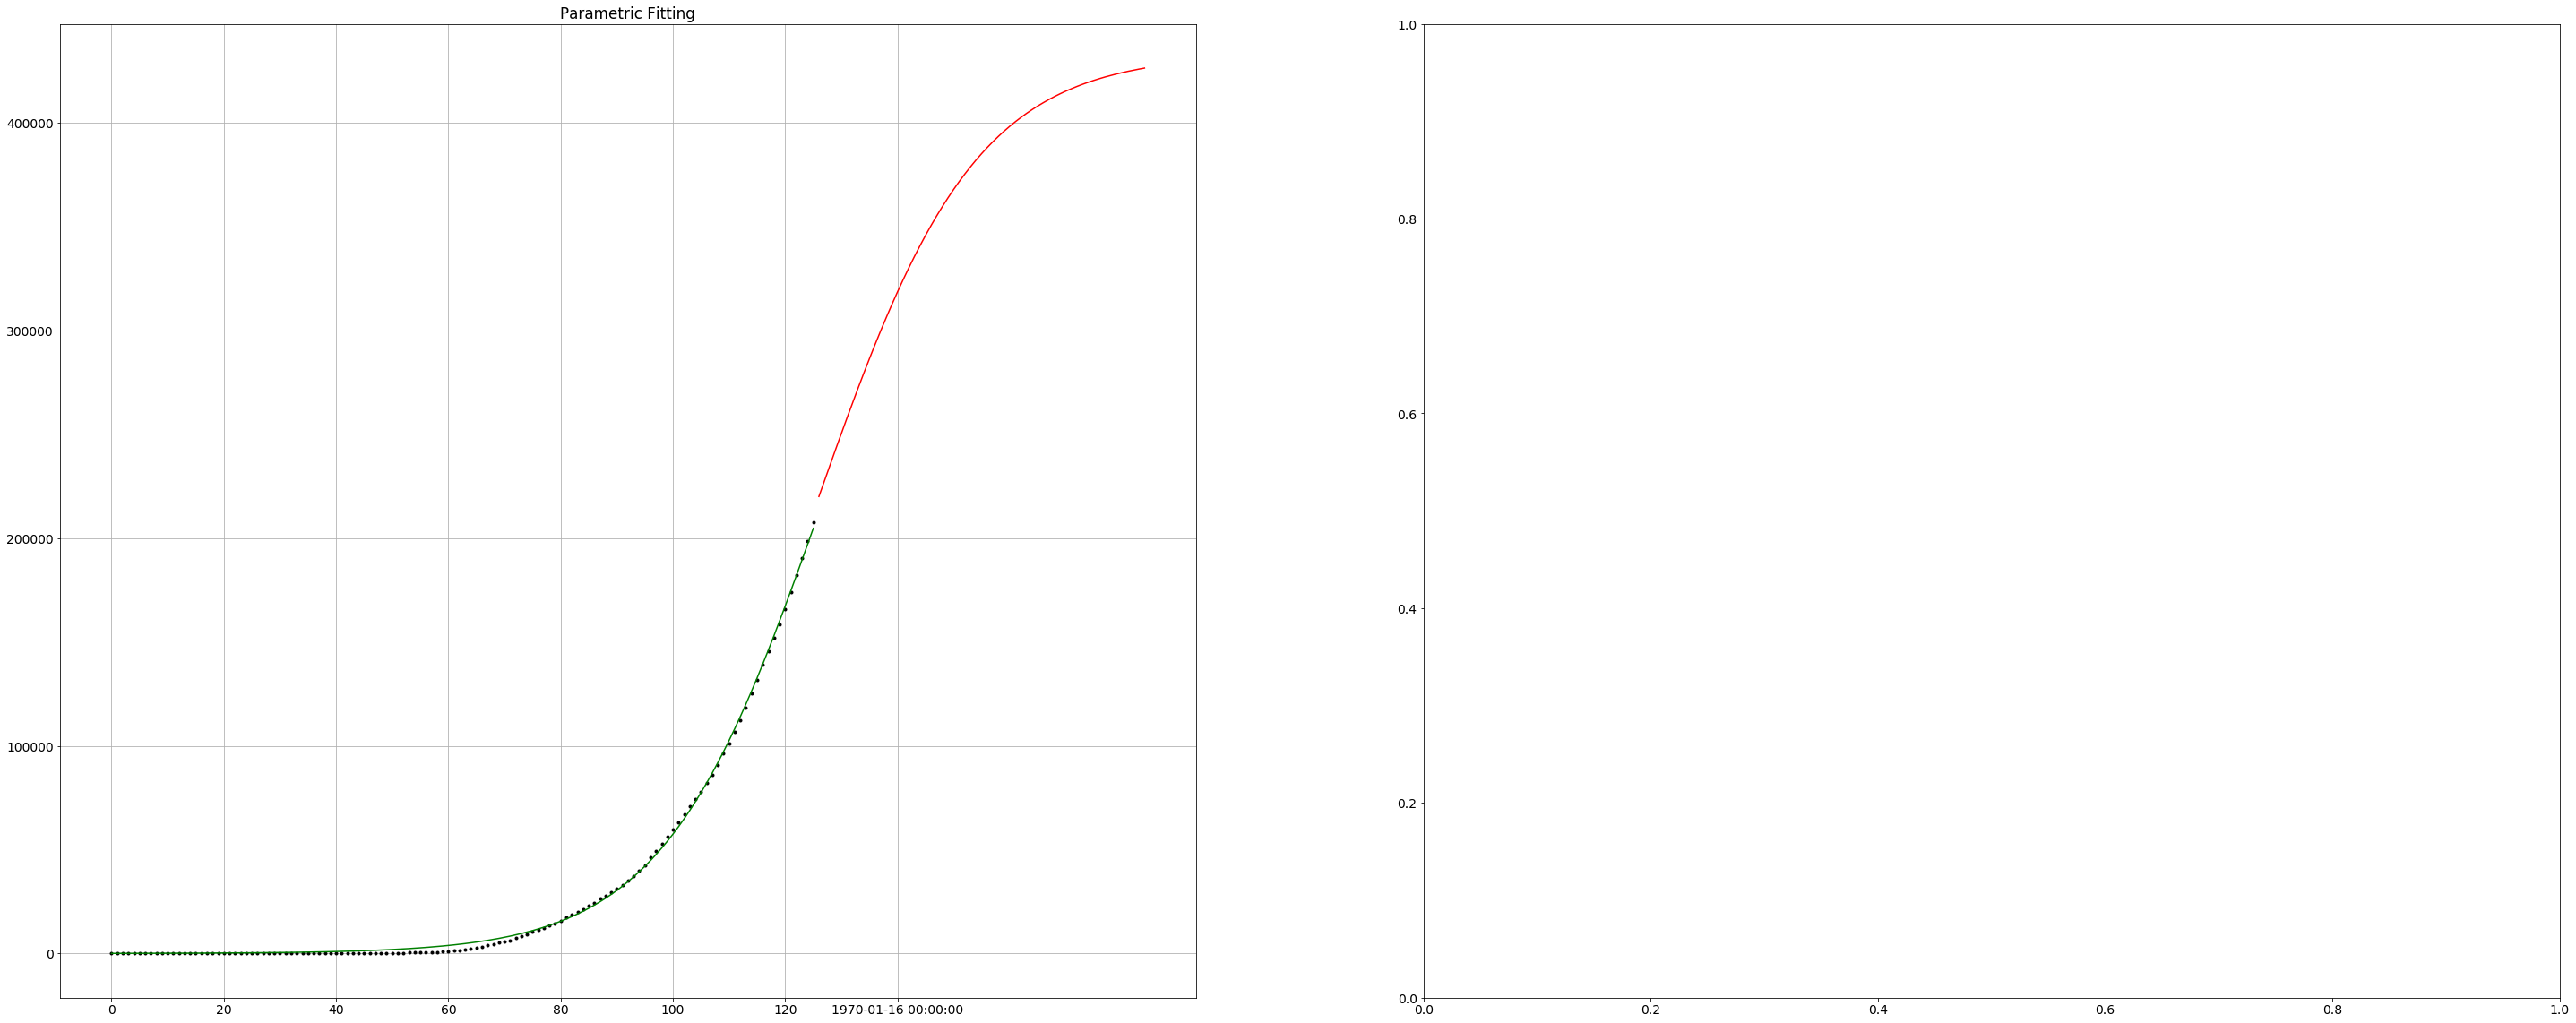

In [142]:
preds = forecast_curve(df["Total_cases"], logistic_model, l_fit, 
                       pred_ahead=60, freq="D", zoom=7)
